# Ampliación de Matemáticas. Curso 2022-23.
## Máster INO, ETSI Navales, UPM

## Control 1.

### Nombre y apellidos: 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Apartado 1

Jorge y Juan están experimentando con números. Ejecutan el código Python siguiente

```python
a=47.215419672114173
b=-0.45000000000000007
c=-0.91006620964286644
result1=a*b*c
temp=b*c
result2=a*temp
result1==result2
```
Juan se queda perplejo ante el resultado; pero Jorge no parece sorprendido.

- (0,5 p.) Explica con la mayor precisión posible qué está realizando el código y qué fenómeno explica el resultado. Escribe tu respuesta abajo en una celda *Markdown*.

>El código realiza el producto $abc$ de dos maneras distintas: primero hace $(ab)c$ y lo almacena en `result1`. Después realiza $a(bc)$, que almacena en `result2`. Los dos resultados son distintos.
>Esto es debido a que la operación $ab$ se realiza del siguiente modo: en primer lugar se redondea ambos factores al número representable en aritmética de coma flotante más próximo, después se realiza el producto y este a su vez se redondea al número representable más próximo: 
$$\mathrm{r}(\mathrm{r}(a)*\mathrm{r}(b)).$$
El primer producto no es más que 
$$\mathrm{r}(\mathrm{r}(\mathrm{r}(a)*\mathrm{r}(b))*\mathrm{r}(c)).$$
El segundo producto es:
$$\mathrm{r}(\mathrm{r}(\mathrm{r}(b)*\mathrm{r}(c))*\mathrm{r}(a)).$$
Claramente, no hay ninguna razón para que, en general, ambas operaciones coincidan, a menos que todas las operaciones siempre den lugar a números representables en el sistema de coma flotante que estemos utilizando.

- (0,5 p.) Jorge ejecuta ahora

```python
d,e = abs(result1-result2), abs((result1-result2)/result1)
print(d,e)
```
¿Qué representan las dos cantidades que aparecen tras ejecutar esta línea? Escribe tu respuesta abajo en una celda *Markdown*.

>La primera cantidad es el error absoluto entre $(ab)c$ y $a(bc)$. La segunda es el error relativo para esas mismas cantidades.

- (0,5 p.) Para concluir el experimento, Juan ejecuta el código del enunciado cambiando las tres primeras líneas por:
```python
a=47.215419672114173*1e8
b=-0.45000000000000007*1e8
c=-0.91006620964286644*1e8
```
y vuelve a ejecutar la línea de código del apartado anterior.
¿Qué diferencia se aprecia entre este experimento y el anterior? Proporciona una explicación lo más precisa posible del motivo por el que los valores de `d`y `e`son distintos en los dos experimentos. Escribe tu respuesta abajo en una celda *Markdown*.

In [67]:
a=47.215419672114173
b=-0.45000000000000007
c=-0.91006620964286644
result1=a*b*c
temp=b*c
result2=a*temp
d,e = abs(result1-result2), abs((result1-result2)/result1)
print(d,e)
a=47.215419672114173*1e8
b=-0.45000000000000007*1e8
c=-0.91006620964286644*1e8
result1=a*b*c
temp=b*c
result2=a*temp
d,e = abs(result1-result2), abs((result1-result2)/result1)
print(d,e)

3.552713678800501e-15 1.837345587030485e-16
2147483648.0 1.1106072598580757e-16


>En el primer caso el error relativo y el absoluto son del mismo orden, mientras que en el segundo el error absoluto es $26$ órdenes de magnitud mayor que el relativo. El error relativo en ambos casos es del mismo orden de magnitud.

>Esto es debido a que dos números representables grandes consecutivos están a mayor distancia que dos números representables pequeños consecutivos. En otras palabras, en el primer caso el error absoluto es grande, mientras que en el segundo es pequeño. Si consideramos el error relativo, estas cantidades son del mismo orden, independientemente de que los números representables sean grandes o pequeños.

## Apartado 2

Los intereses de Jorge y Juan se desplazan hacia la química. La energía potencial del sistema formado por dos átomos de Xenon se expresa en función de la distancia $r$ entre los dos átomos como:

$$ V(r) = 4\epsilon\left[ \left( \frac{\sigma}{r} \right)^{12} - \left( \frac{\sigma}{r} \right)^6 \right], $$

siendo $\sigma = 1.77$ angstroms y $\epsilon = 4.10$ kJ/mol.


- (0,5 p.) Produce una figura en la que se representen la gráfica de la energía potencial $V$ como función de $r$ junto con el eje $y=-2$ en el intervalo $[1.7,6]$.

In [2]:
def V(r, e=4.10,sig=1.77):
    l=(sig/r)**6
    return 4*e*(l**2-l)

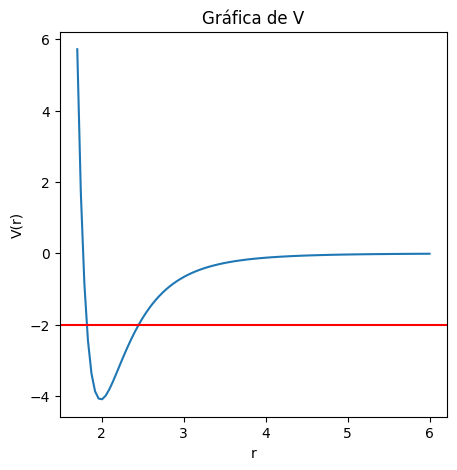

In [3]:
xmin = 1.7
xmax = 6
x_eval = np.linspace(xmin, xmax,100)
y_eval = V(x_eval)
plt.figure(figsize=(5,5))
plt.plot(x_eval, y_eval)
plt.title('Gráfica de V')
plt.xlabel('r')
plt.ylabel('V(r)')
plt.axhline(y=-2, color='r')
plt.show()

- (0,5 p.) Utilizando la gráfica anterior junto con tus conocimientos de cálculo elemental, ¿puedes asegurar que $V(r)$ se toma el valor $-2$ para algún valor de $r$? Si es así, indica su(s) localización(s) aproximada(s). ¿Puede haber alguna valor adicional de $r\geq 0$ con esta propiedad y que no esté en la gráfica? Escribe tu respuesta abajo en una celda *Markdown*. 

> La función $V$ se reescribe como:
$$ V(r)=g\left(\left( \frac{\sigma}{r}\right)^6\right),\quad g(s):=4\epsilon(s^2-s).$$
Por tanto, los valores deseados son los que cumplen
$$ \left(\frac{\sigma}{r}\right)^6=s_* $$
con
$$g(s_*)=-2 \iff 4\epsilon(s_*^2-s_*)=-2 \iff s_*^2 - s_* + \frac{1}{2\epsilon}=0.$$
Esta última ecuación tiene por únicas soluciones, siempre que $\epsilon>2$:
$$ s_\pm := \frac{1\pm \sqrt{1-2/\epsilon}}{2}. $$
Por tanto hay dos únicos valores de $r$ para los que $V(r)=-2$:
$$ r_\pm = s_\pm^{-1/6}\sigma. $$

- (1 p.) Nos interesamos ahora en calcular un valor de $r$ comprendido entre $1.7$ y $6$ para el que la energía potencial es igual a $-2$.
    * En caso de que fuera posible, aproxima dicho valor utilizando el método de la bisección con un intervalo inicial adecuado.
    * ¿Cuántas iteraciones necesitará para aproximar dicha raíz con precisión de al menos $10^{-5}$? Si cambiáramos los valores de $\sigma$ y $\epsilon$ por otros valores positivos manteniendo fija la longitud del intervalo inicial, ¿cómo cambia el número de iteraciones? Escribe tu respuesta abajo en una celda *Markdown*.



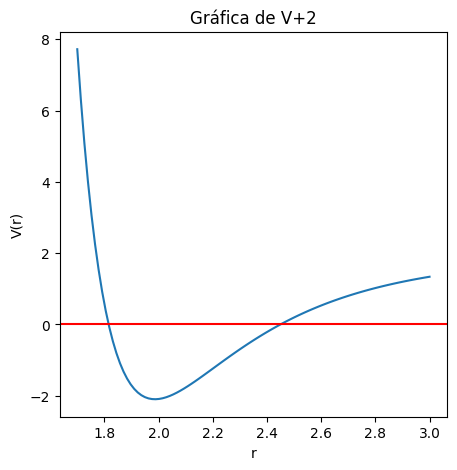

In [4]:
# Calcular los valores donde V vale -2 es lo mismo que 
# hallar raíces de V+2

def V2(r, e=4.10,sig=1.77):
    return V(r,e,sig)+2

xmin = 1.7
xmax = 3
x_eval = np.linspace(xmin, xmax,100)
y_eval = V2(x_eval)
plt.figure(figsize=(5,5))
plt.plot(x_eval, y_eval)
plt.title('Gráfica de V+2')
plt.xlabel('r')
plt.ylabel('V(r)')
plt.axhline(color='r')
plt.show()

In [68]:
# Aproximamos el menor valor de  r 
# tomamos como intervalo inicial [1,2]

from scipy.optimize import bisect

r0,err0 = bisect(V2,1,2,full_output=True)


# Aproximamos el menor valor de  r 
# tomamos como intervalo inicial [2,3]

r1,err1 = bisect(V2,2,3,full_output=True)

print('Las raíces son %f y %f,\nel número de iteraciones respectivas es %d y %d.'%(r0, r1, err0.iterations, err1.iterations))

Las raíces son 1.815818 y 2.450059,
el número de iteraciones respectivas es 39 y 39.


>Como el intervalo inicial que hemos proporcionado tiene longitud igual a uno, sabemos que, tras $n$ iteraciones el error se acota por:
$$e_n\leq \frac{1}{2^n}.$$
Esta cantidad será menor que $10^{-5}$ cuando
$$2^n>10^5 \iff n>\frac{5\log{10}}{\log{2}} \iff n>17.$$
>El número de iteraciones que requiere el método de la bisección para aproximar la raíz de una función con una tolerancia dada únicamente depende de la longitud del intervalor inicial, no de la función particular a la que se lo apliquemos. 

- (1 p.) Nos interesamos ahora en encontrar el valor de $r$ para el que la energía potencial $V(r)$ es mínima.
    * Plantea este problema como la búsqueda de una raíz de una cierta función $f(r)$:
    $$ f(r)=0 $$
    indicando cual es esa función $f$. Escribe tu respuesta abajo en una celda *Markdown*.
    * Aproxima dicho valor utilizando un método numérico de tu elección distinto al método de la bisección.

> Vemos a través de la gráfica que $V(r)$ posee un único mínimo en el intervalor $[1.7,6]$. Hallarlo basta resolver 
$$ V'(r)=0 $$
para $r$ en ese intervalo, puesto que $V$ parece no tener más puntos críticos.
Calculamos la derivada:
$$ V'(r) = 24\left( \frac{\sigma}{r} \right)^5\left[ 1- 2\left( \frac{\sigma}{r} \right)^6 \right]\left( \frac{\sigma}{r^2} \right). $$
Esta función se anula si y sólo si:
$$1- 2\left( \frac{\sigma}{r} \right)^6=0,$$
es decir, cuando
$$ r=2^{1/6}\sigma.$$

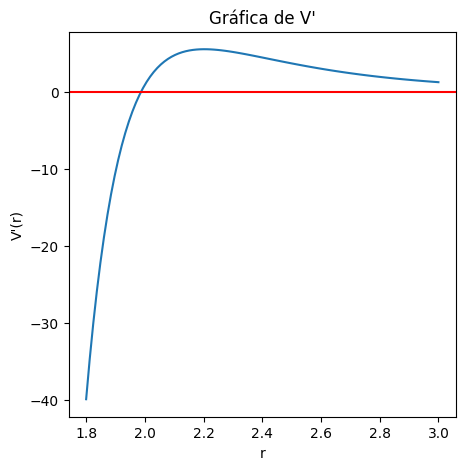

In [61]:
# Definimos f como la derivada de V

def f(r, e=4.10,sig=1.77):
    l=sig/r
    return 24*e*l**5*(1-2*l**6)*(l/r)

xmin = 1.8
xmax = 3
x_eval = np.linspace(xmin, xmax,100)
y_eval = f(x_eval)
plt.figure(figsize=(5,5))
plt.plot(x_eval, y_eval)
plt.title("Gráfica de V'")
plt.xlabel('r')
plt.ylabel("V'(r)")
plt.axhline(color='r')
plt.show()

In [11]:
def secante_full_output(f, x0, x1, ytol=1e-6, maxiter=100):
    '''Aproxima una raíz de una ecuación no lineal mediante el método de la secante
    
    Argumentos:
     - f  : función f:R -> R
     - x0 : aproximación inicial a la raíz
     - x1 : otra aproximación a la raíz
     - xtol : tolerancia para el criterio de la |xn1 - xn| < xtol
     - maxiter : el método se detendrá después de maxiter iteraciones
                 aunque no se haya alcanzado un error menor que la tolerancia
                 
    Devuelve:
     - x: estimación de la raíz
     - aproxs: todas las aproximaciones a la raíz
    '''
    xn = x1
    xn_1 = x0
    j = 1
    aprox = [x0,x1]
    while abs(f(xn)) > ytol and j < maxiter :
        xnew = xn - f(xn)*(xn-xn_1)/(f(xn) - f(xn_1))
        xn_1, xn = xn, xnew
        j = j + 1
        aprox.append(xnew)
    if j>=maxiter:
        raise Exception('Error: no hemos encontrado la raiz después de %s iteraciones'%maxiter)
    return xn, np.array(aprox)

In [62]:
# calculamos la raíz de f usando el método de la secante
rmin=secante_full_output(f, 1.8, 2)
print(rmin[0])

1.986757825491225


## Apartado 3

En aras de mejorar su situación económica, Jorge y Juan deciden probar suerte en el campo del análisis de datos. Idean la siguiente función:

```python
import numpy as np
import scipy.linalg as la

def method(nodes, data):
    l = len(nodes)
    v = np.zeros((l,3))
    for i in range(l):
        for j in range(3):
            v[i,j] = nodes[i]**j
    result = la.solve(v.T@v, v.T@data)       
    return result
```

- (1 p.) ¿Para qué sirve esta función? Escribe tu respuesta abajo en una celda *Markdown*.

> Calcula los coeficientes del polinomio aproximador de grado dos asociado a los puntos `nodes`y los valores `data`.

- (0.5 p.) ¿Qué método numérico utiliza? Escribe tu respuesta abajo en una celda *Markdown*.

> Resuelve el sistema
$$ V^T V \mathbf{a} = V^T {\mathbf{y}} $$
donde $V$ es la matriz de Vandemonde:
$$
V= \begin{bmatrix}1&x _{0} &x _{0}^{2}\\1&x _{1} &x _{1}^{2}\\\vdots &\vdots &\vdots  \\1&x _{N}& x _{N}^{2}\end{bmatrix},
$$
siendo $x_0,x_1,\dots,x_N$ los puntos por los que se interpola y
$$
\mathbf{a}=\begin{bmatrix}a _{0}\\a_1\\a_2\end{bmatrix},\quad \mathbf{y}=\begin{bmatrix}y _{0}\\y_1\\\vdots\\y_N\end{bmatrix}.
$$

- (0.5 p.) ¿Hay alguna función de la librería `numpy`que calcule lo mismo? En caso afirmativo, escribe una línea de código que reproduzca el resultado de `method` con dicha función. Escribe tu respuesta abajo en una celda *Markdown*.
 

> Sí, la función `numpy.polyfit`. Los coeficientes del polinomio aproximador de orden dos se obtienen mediante:
>```python
numpy.polyfit(xs,ys,2) 

>Acordaos que el orden de los coeficientes es el inverso del obtenido mediante `method`. Para obtener exactamente la misma salida deberíamos hacer:
>```python
numpy.flip(numpy.polyfit(xs,ys,2))


## Apartado 4

Jorge y Juan reciben su primer encargo profesional. Se trata de ajustar los puntos
```python
xs = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
```
y los valores
```python
ys = [3, 14, 23, 25, 23, 15, 9, 5, 9, 13, 17, 24, 32, 36, 46]
```
a un polinomio.

- (0.5 p.) Produce una figura que contengan las gráficas de
    1. los puntos `(xs,ys)`,
    2. el polinomio interpolador por esos puntos.

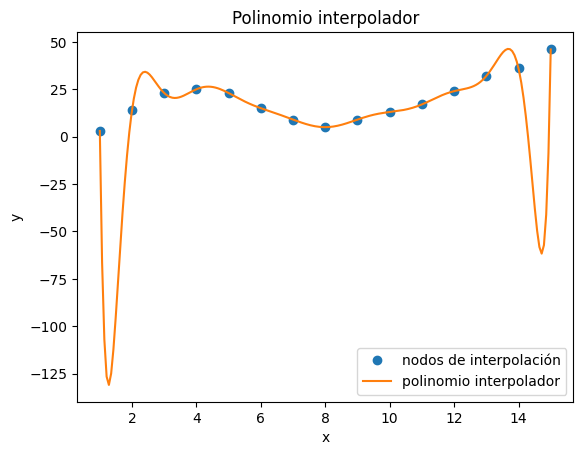

In [57]:
xs = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
ys = [3, 14, 23, 25, 23, 15, 9, 5, 9, 13, 17, 24, 32, 36, 46]

l = len(xs)
cs = np.polyfit(xs,ys,l-1)

x_eval = np.linspace(min(xs),max(xs),200)
y_eval = np.polyval(cs,x_eval)

plt.plot(xs, ys, 'o', label='nodos de interpolación')
plt.plot(x_eval, y_eval, label='polinomio interpolador')
plt.title('Polinomio interpolador')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

- (0.5 p.) ¿Qué grado tiene el polinomio interpolador? ¿Es esta una buena estrategia para ajustar los datos a una función polinomial? Razona tu respuesta y escríbela en una celda *Markdown*.

>- Sabemos que el polinomio interpolador tiene grado $N-1$, siendo $N$ el número de puntos por los que vamos a interpolar. En este caso, $N=15$ por lo que se trata de un polinomio de grado $14$.
>- Claramente, no es una buena estrategia. La interpolación polinomial suele dar resultados pobres cuando el número de puntos es relativamente grande y los puntos están equiespaciados. Esto se conoce como *fenómeno de Runge*: el polinomio interpolador desarrolla fuertes oscilaciones en torno a los puntos cercanos a los extremos. Este problema se soluciona tomando como puntos los *nodos de Chebyshev*, aunque esta estrategia tiene el inconveniente de su alto coste computacional.

- (Extra: 0.5 p.) Pocas horas antes de que acabe el plazo de entrega, el cliente presenta un requerimiento adicional: desea que el polinomio, además de ajustar los datos del enunciado, ajuste dos nuevos valores y puntos: `np.append(xs,[16,17])` y `np.append(ys,[60,75])`. ¿Cual sería el método óptimo a seguir para construir el nuevo polinomio interpolador? Razona tu respuesta y escríbela en una celda *Markdown*.

>El mejor método a seguir en este caso es el método de Newton, que permite utilizar el polinomio interpolador ya calculado para construir el nuevo polinomio una vez añadidos los dos nuevos puntos y valores. Esto no es posible con el método de Lagrange o el método de fuerza bruta.

- (0.5 p.) Produce una figura que contengan las gráficas de
    1. los puntos `(xs,ys)`,
    2. los polinomios aproximadores por esos puntos de grados $N$ donde $N$ varía entre los números impares de $1$ a $9$.

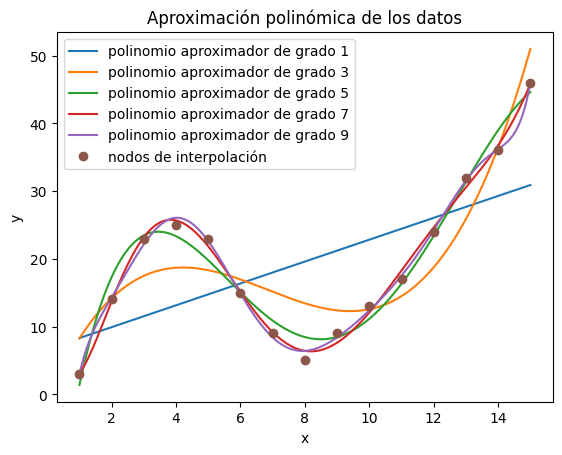

In [27]:
degs = [2*n+1 for n in range(5)]
for n in degs:
    cs = np.polyfit(xs,ys,n)

    x_eval = np.linspace(min(xs),max(xs),200)
    y_eval = np.polyval(cs,x_eval)

    plt.plot(x_eval, y_eval, label='polinomio aproximador de grado %d'%n)

plt.plot(xs, ys, 'o', label='nodos de interpolación')
plt.title('Aproximación polinómica de los datos')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

- (0.5 p.) ¿Qué grado de polinomio reproduce mejor la tendencia de los datos? Razona por qué esto es así y escribe tu respuesta en una celda *Markdown*.

> La tendencia se reproduce mejor con el polinomio de grado siete, seguido del polinomio de grado cinco. Los modelos correspondientes a los polinomios de grado uno y tres son demasiado simples, mientras que el de grado nueve produce oscilaciones espúreas cerca de los nodos extremales que no se corresponden con la tendencia de los datos. Se trata de un fenómeno de *overfitting*.

## Apartado 4

Tras cosechar un buen número de éxitos profesionales, Jorge y Juan deciden focalizar sus energías en su profesión vocacional: la arquitectura naval. Ponen su objetivo en lograr un diseño de embarcación revolucionario; para ello comienzan a experimentar con formas inspiradas en su etapa de estudio de la química. Consideran el potencial de Lennard-Jones $V(r)$ del apartado 2.

- (1 p.) Interpola la función $V(r)$ del apartado 2 mediante $N$ puntos equiespaciados entre $1.7$ y $6$ para $N=10, 30, 100$ usando:
    * El polinomio interpolador.
    * Interpolación lineal a trozos.
    * Interpolación mediante spline cúbicas.

Para cada tipo de interpolación, representa los resultados obtenidos en una en la que se represente la función $V(r)$ junto con las interpolaciones correspondientes a los tres valores de $N$.

In [40]:
def lagrange(xs, ys, x_eval):
    '''Polinomio interpolador, usando la base de Lagrange
    
    INPUTS:
        - `xs` coordenada x de los puntos de interpolación
        - `ys` coordenada y de los puntos de interpolación
        - `x_eval` es una coordenada, o un array de coordenadas x
          donde evaluar el polinomio, y también puede ser una variable
          simbólica de sympy
    
    OUTPUTS
        - `y_eval` array (o float, o variable simbólica) resultado 
                   de evaluar el polinomio interpolador en x_eval
    '''
    n = len(xs)
    y_eval = np.zeros_like(x_eval)
    for i in range(n):
        xi = xs[i]
        yi = ys[i]
        base = np.ones_like(x_eval)
        for j in range(n):
            if j!=i:
                xj = xs[j]
                base = base*(x_eval - xj)/(xi - xj)
        y_eval = y_eval + base*yi
    return y_eval

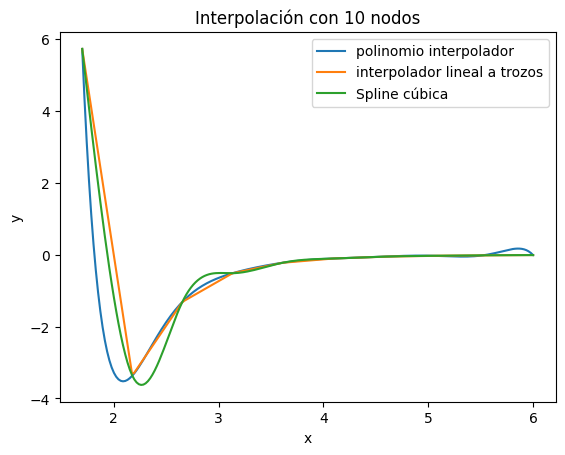

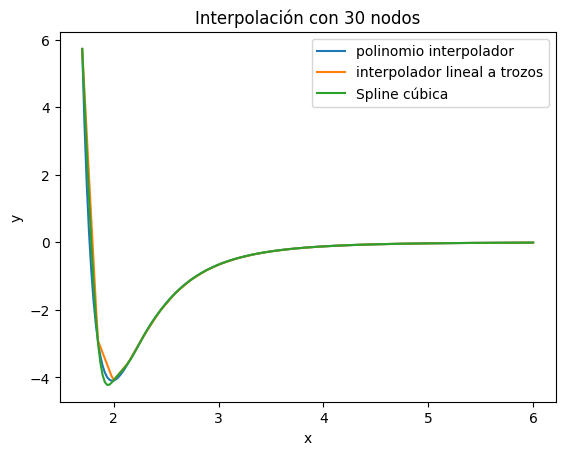

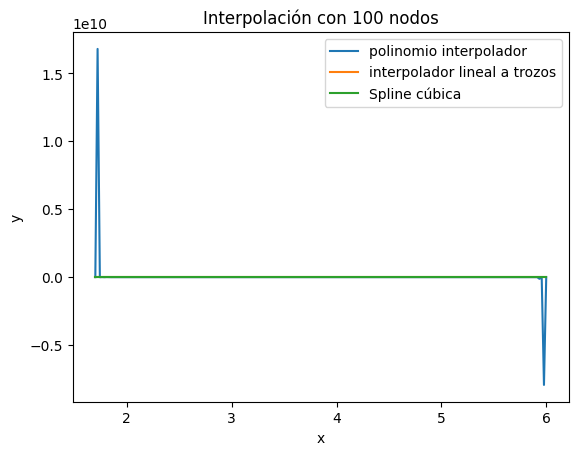

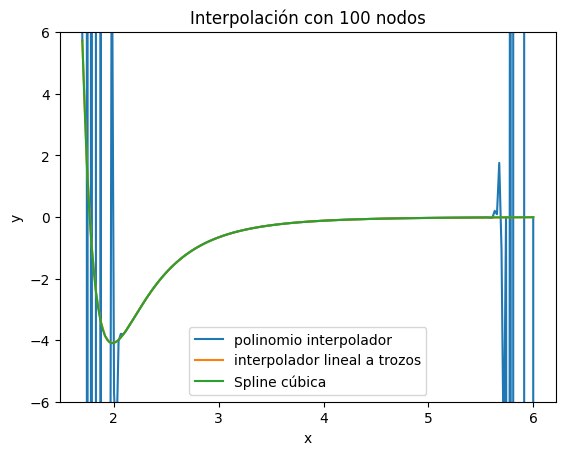

In [46]:
from scipy . interpolate import UnivariateSpline, CubicSpline
npoints = [10, 30, 100]
xmin = 1.7
xmax = 6

for l in npoints:
    xs = np.linspace(xmin,xmax,l)
    ys = V(xs)
    
    x_eval = np.linspace(xmin,xmax,200)
    
    s1 = UnivariateSpline(xs , ys , k=1, s =0)
    s3 = CubicSpline(xs, ys, bc_type='natural')
 
    plt.plot(x_eval, lagrange(xs, ys, x_eval), label='polinomio interpolador')
    plt.plot(x_eval, s1(x_eval), label='interpolador lineal a trozos')
    plt.plot(x_eval, s3(x_eval), label='Spline cúbica')

    plt.title('Interpolación con %d nodos'%l)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

# repetimos la última figura forzando a que el rango de y esté 
# comprendido entre -6 y 6

plt.ylim(-6,6)
plt.plot(x_eval, lagrange(xs, ys, x_eval), label='polinomio interpolador')
plt.plot(x_eval, s1(x_eval), label='interpolador lineal a trozos')
plt.plot(x_eval, s3(x_eval), label='Spline cúbica')

plt.title('Interpolación con %d nodos'%l)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


- (0,5 p.) ¿De los tres métodos anteriores, cual(es) producen una función que aproxima cada vez mejor al potencial original $V(r)$ cuando hacemos $N$ crecer hacia infinito? Describe cual es la explicación matemática de tu respuesta y escríbela en una celda *Markdown*.

> Tanto la interpolación mediante funciones lineales a trozos como mediante splines cúbicas producen funciones que aproximan mejor la función $V$ cuando el número de puntos $N$ tiende a infinito. Esto es debido a que $V$ es derivable a todos los órdenes y por tanto las estimaciones de error vistas en clase se pueden aplicar. En el caso del polinomio interpolador este nos es el caso, nuevamente debido al *fenómeno de Runge*. Podemos observar en la gráfica correspondiente al caso $N=100$ como el polinomio interpolador desarolla oscilacioines muy fuertes en torno a los nodos que se encuentran cerca de los extremos del intervalo.

- (Extra 1 p.) Calcula, utilizando el método de la secante, las raíces del la función $S_{10}(r)$, para $r$ entre $1.7$ y $6$, obtenida interpolando los valores de $V(r)$ mediante una spline cúbica por $10$ puntos equiespaciados.

In [72]:
xs = np.linspace(xmin,xmax,10)
ys = V(xs)
    
s3 = CubicSpline(xs, ys, bc_type='natural')
r0 = secante_full_output(s3,1.8,2)
print(r0[0])

1.7380370418951652
